In [1]:
#@title imports 
import os
import pickle as pkl
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot as uplot
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
from UMAP import *
pd.options.mode.use_inf_as_na = True

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarni

In [3]:
def plot_UMAP_clusters_single(data_inh, neighbours, distance, res_louvain, random_state, c_list ,save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_umap_scaler = StandardScaler()
    data_umap = data_umap_scaler.fit_transform(data_inh)
    data_umap = normalize(data_umap)
 
    neighbours = neighbours
    dist = distance
    reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
    mapper = reducer.fit(data_umap)
    
    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)
    
    louvain = Louvain(resolution=res_louvain,random_state=random_state)
    adjacency = mapper.graph_
    labels_exc = louvain.fit_predict(adjacency)

    print(len(set(labels_exc)))
    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_umap)



    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])

    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list[:len(set(labels_exc))],ax=ax12d)
    # sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',ax=ax12d)

    # ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    ax12d.legend()
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    
    plt.show()

    return labels_exc,mapper,reducer

In [4]:
CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.251,	0.412, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.898,	0.41 , 0.165],
                    [0.834,	0.3 , 0.265],
                    [0.912,	0.8 , 0.112],
                    [0.612,	0.3 , 0.834],
                    [0.199, 0.21, 0.133],
                    [.60, .179, .113]]

len(coherence_colors)

12

pid: the identifier of the probe insertion

eid: the identifier of the session (two probes are inserted each recording session)

probe: whether it was probe 1 or 2

subject: name of the mouse

waveform: the mean waveform for this neuron

neuron_id: identifier of the neuron

acronym: the Allen atlas acronym of the brain region this neuron was recorded in, can also be used to identify which layer the neuron was in

spike_amp: the spike amplitude

pt_ratio: the peak-to-through ratio

rp_slope: the repolarization slope

pt_subtract: the peak minus the through

rc_slope: the recovery slope

peak_to_through: the time in ms from the peak (max amplitude) to the through (min amplitude) of the waveform

spike_width: the time from the through to the first peak after the through (this is slightly different from 
peak_to_through because with extracellular waveforms you sometimes have a peak before the through which messes up the 
peak_to_through metric)

firing_rate: in Hz over the entire recording

n_waveforms: number of waveforms the mean waveform is based on

date: date of the recording

mod_index: 5-HT modulation index for this neuron: if it's positive the neuron was enhanced and if it's negative the neuron was suppressed by serotonin

modulated: whether the neuron was significantly modulated by serotonin

sert-cre: whether the mouse was a Sert-cre mouse (which should show an effect) or not. If it's not a Sert-cre mouse, the 
stimulation should not do anything in this mouse. (1: sert-cre, 0: control)

anesthesia: whether the mouse was under anesthesia (1: yes, 0: no)

brain_region: the brain region the neuron was recorded in


In [5]:
data = pd.read_pickle(open('C:/Users/Nishant Joshi/Documents/Guido/data_np.pkl','rb'))
data_df = pd.DataFrame(data,columns = ['pid', 'eid', 'probe', 'subject', 'waveform', 'neuron_id',
       'acronym', 'spike_amp', 'pt_ratio', 'rp_slope', 'pt_subtract',
       'rc_slope', 'peak_to_trough', 'spike_width', 'firing_rate',
       'n_waveforms', 'date', 'mod_index', 'modulated', 'sert-cre',
       'anesthesia', 'brain_region'])
data_df_control = data_df[data_df['sert-cre']==0.0]
data_df_ser =  data_df[data_df['sert-cre']!=0.0]



7


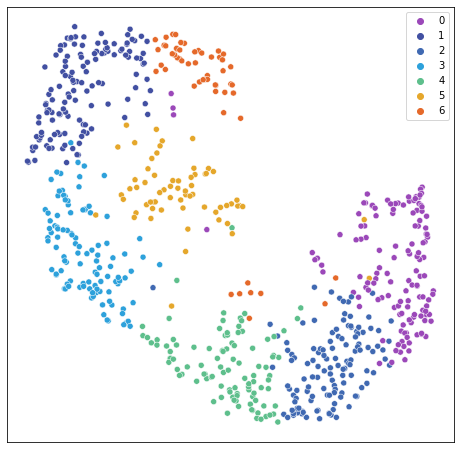

In [6]:
labels_ephys,_,_ = plot_UMAP_clusters_single(np.vstack(data_df_control['waveform']),20,0.1,1.,42,coherence_colors)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = ax.scatter(scout_x, scout_y, **kws)
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(*args, **kws)


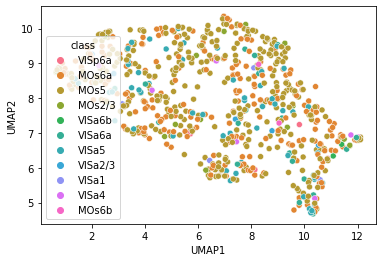

In [7]:
neighbours = 20
dist = 0.1
random_state = 42
data_umap = np.vstack(data_df_control['waveform'])
reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
mapper = reducer.fit(data_umap)
mods = []


clusterable_embedding2d_exc =reducer.fit_transform(data_umap)


df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
        'UMAP2':clusterable_embedding2d_exc[:, 1],
        'class':data_df_control['acronym']}
sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',cmap=coherence_colors)
plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = ax.scatter(scout_x, scout_y, **kws)
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(*args, **kws)


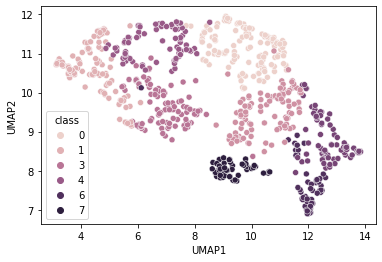

In [8]:
neighbours = 20
dist = 0.0
random_state = 42
data_umap = np.vstack(data_df_control['waveform'])
reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
mapper = reducer.fit(data_umap)
mods = []

# for res in np.arange(0.5,3.5,0.3):
res = 1.
louvain = Louvain(resolution=res,random_state=random_state)
adjacency = mapper.graph_
labels_ephys = louvain.fit_predict(adjacency)
mods.append((res, get_modularity(adjacency,labels_ephys)))

clusterable_embedding2d_exc =reducer.fit_transform(data_umap)


df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
        'UMAP2':clusterable_embedding2d_exc[:, 1],
        'class':labels_ephys}
sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',cmap=coherence_colors)
plt.show()

In [9]:
data_df_control['labels_lv'] = labels_ephys

<ipython-input-9-e7f320753c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_control['labels_lv'] = labels_ephys


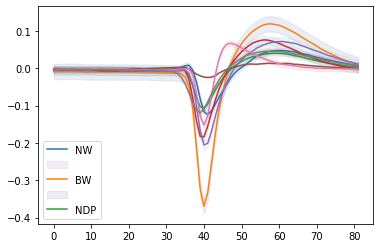

In [10]:
fig, ax = plt.subplots()

for i,j in zip(set(data_df_control.labels_lv),coherence_colors):
    x = np.arange(len(np.mean(data_df_control[data_df_control.labels_lv==i]['waveform'])))
    y = np.mean(data_df_control[data_df_control.labels_lv==i]['waveform'])
    #some confidence interval
    ci = 1.96 * np.std(y,axis=0)/np.sqrt(len(y))
    ax.plot(x,y,)
    ax.fill_between(x, (y-ci), (y+ci), color=j, alpha=.1)
ax.legend(['NW','','BW','','NDP'])    
plt.show()


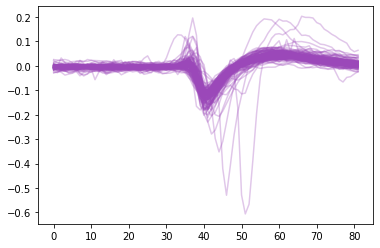

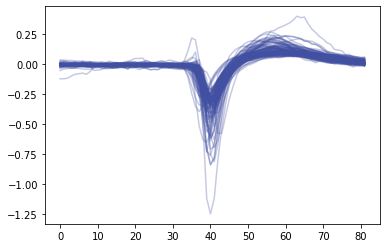

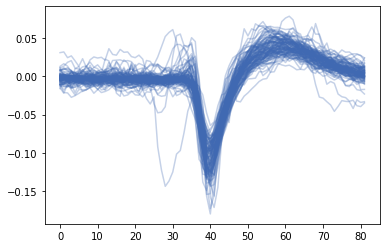

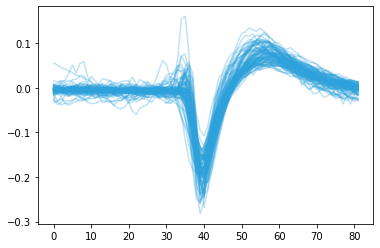

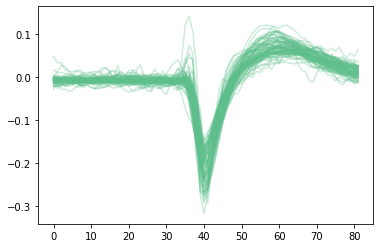

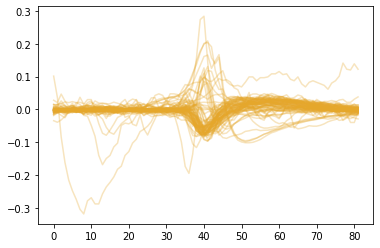

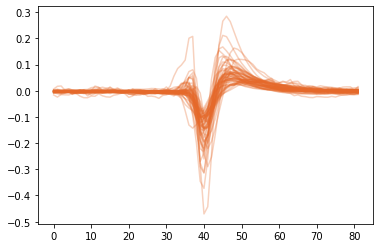

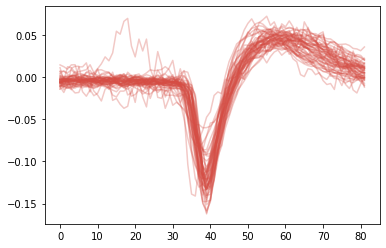

In [11]:
for i,j in zip(set(data_df_control.labels_lv),coherence_colors):
    plt.plot(np.vstack(data_df_control[data_df_control['labels_lv']==i]['waveform']).T,c=j,alpha=0.3)
    plt.show()

In [26]:
waveforms = np.load("D:/NPUltraWaveforms/NPUltraWaveforms/clusters.waveforms.npy")
clusters = np.load("D:/NPUltraWaveforms/NPUltraWaveforms/spikes.clusters.npy")
clust  = np.load("D:/NPUltraWaveforms/NPUltraWaveforms/clusters.CCF_APDVLR.npy")
clust_acr = pd.read_csv("D:/NPUltraWaveforms/NPUltraWaveforms/clusters.acronym.tsv",sep='\t')
spike_times  = np.load("D:/NPUltraWaveforms/NPUltraWaveforms/spikes.times.npy")

In [29]:
clust_acr

,acronym,level1,level2,level3,level4,level5,level6,level7,level8,level9
0,VISp4,root,grey,CH,CTX,CTXpl,Isocortex,VIS,VISp,VISp4
1,VISp4,root,grey,CH,CTX,CTXpl,Isocortex,VIS,VISp,VISp4
2,VISpm4,root,grey,CH,CTX,CTXpl,Isocortex,VIS,VISpm,VISpm4
3,VISpm2/3,root,grey,CH,CTX,CTXpl,Isocortex,VIS,VISpm,VISpm2/3
4,VISpm2/3,root,grey,CH,CTX,CTXpl,Isocortex,VIS,VISpm,VISpm2/3
...,...,...,...,...,...,...,...,...,...,...
5689,RL,root,grey,BS,MB,MBsta,RAmb,RL,-,-
5690,RL,root,grey,BS,MB,MBsta,RAmb,RL,-,-
5691,EW,root,grey,BS,MB,MBmot,EW,-,-,-
5692,EW,root,grey,BS,MB,MBmot,EW,-,-,-


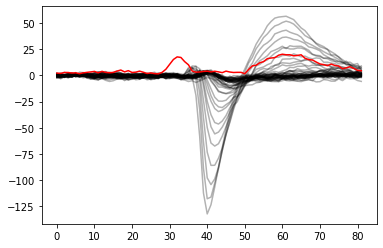

In [36]:
plt.plot(waveforms[0][:,::8],c='k',alpha=0.3)
plt.plot(np.max(waveforms[2][:,::8],axis=1),c='r',alpha=1.)

plt.show()



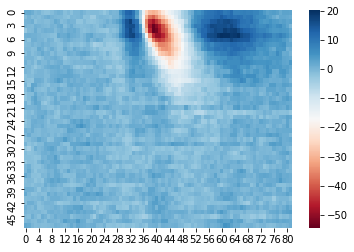

In [32]:
sns.heatmap(waveforms[2][:,::8].T,cmap='RdBu')
plt.show()
# sns.heatmap(waveforms[2][:,:20].T,cmap='RdBu')
# plt.show()
